In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [62]:
df["Age"].min()


21

In [63]:
df["Age"].max()

81

In [64]:
df.shape

(768, 9)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
for i in df:
    print(f"col {i}\n")

col Pregnancies

col Glucose

col BloodPressure

col SkinThickness

col Insulin

col BMI

col DiabetesPedigreeFunction

col Age

col Outcome



In [68]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.drop("Pregnancies",axis=1,inplace=True)

In [70]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [71]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [72]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.shape

(768, 8)

In [74]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [6]:
df.rename(columns={"DiabetesPedigreeFunction":"DPF"},inplace=True)

In [7]:
cols=df.columns

In [77]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [78]:
corrs=pd.DataFrame(df.corr())
corrs

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

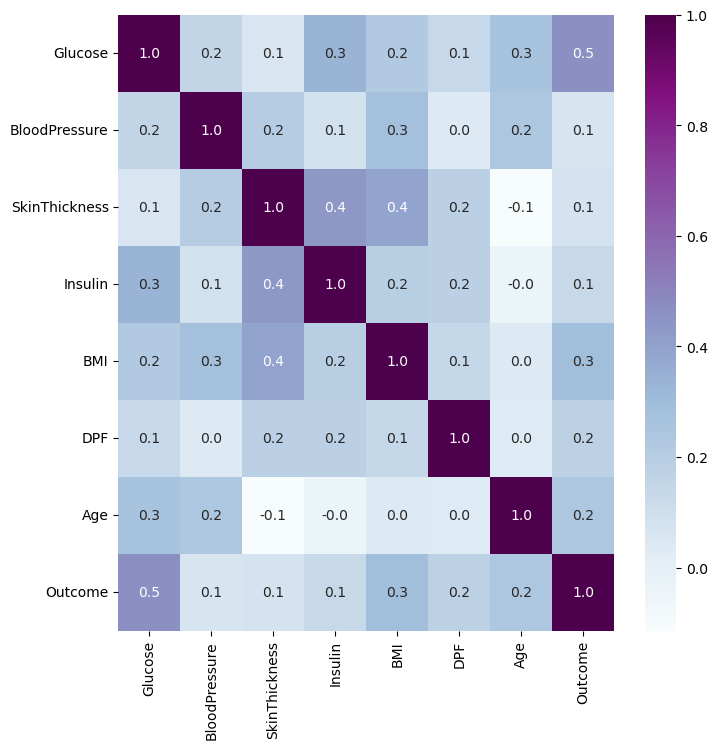

In [79]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="BuPu",fmt=".1f")

In [80]:
C=pd.DataFrame(df.corr()["Outcome"])

<Axes: >

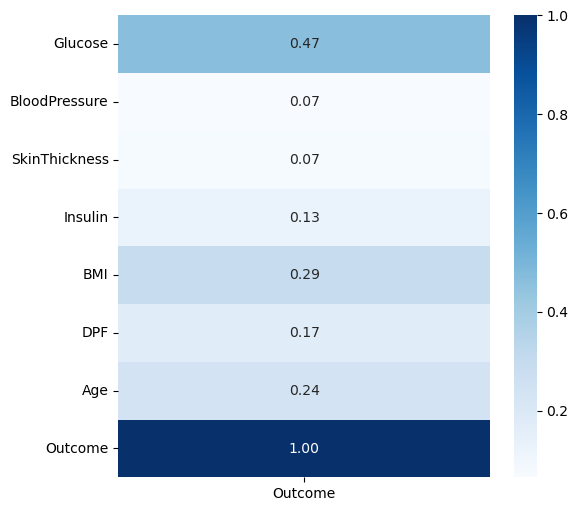

In [81]:
plt.figure(figsize=(6,6))
sns.heatmap(C,annot=True,cmap="Blues",fmt=".2f")

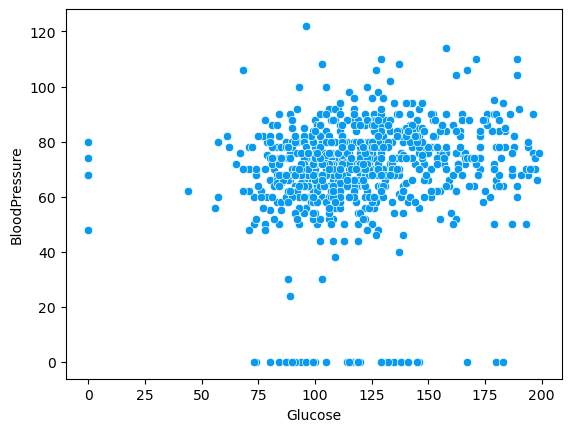

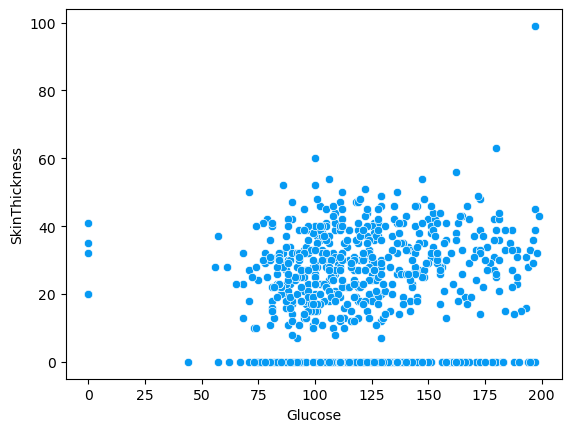

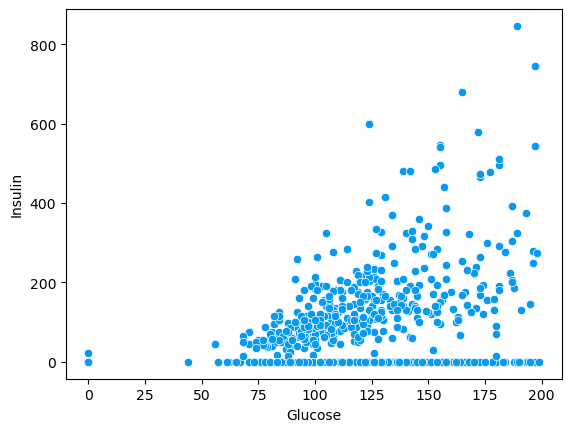

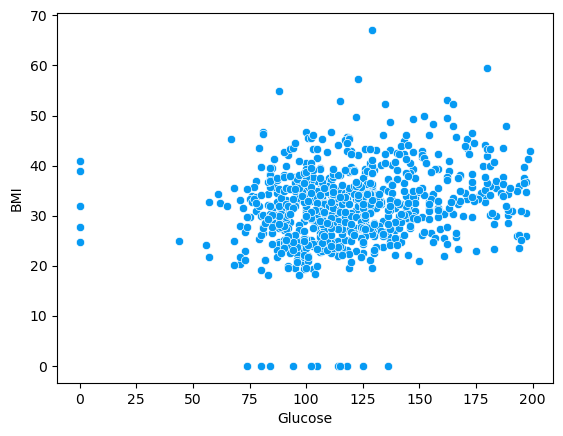

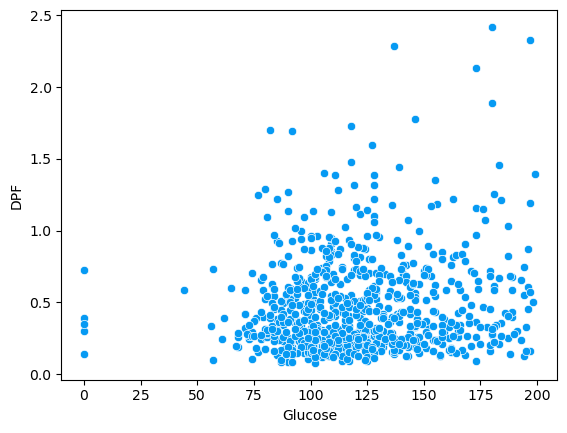

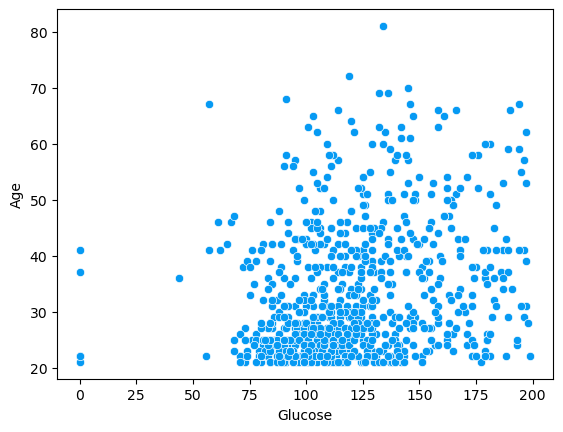

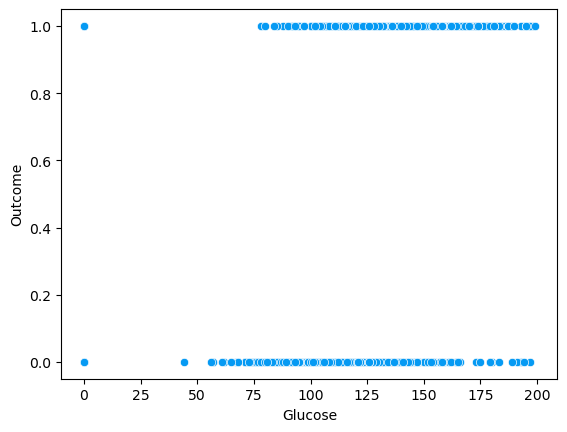

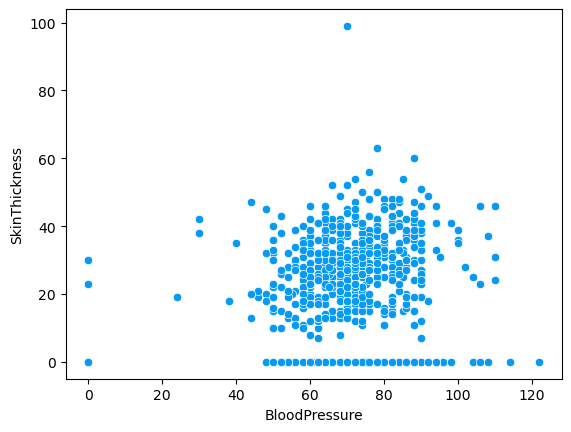

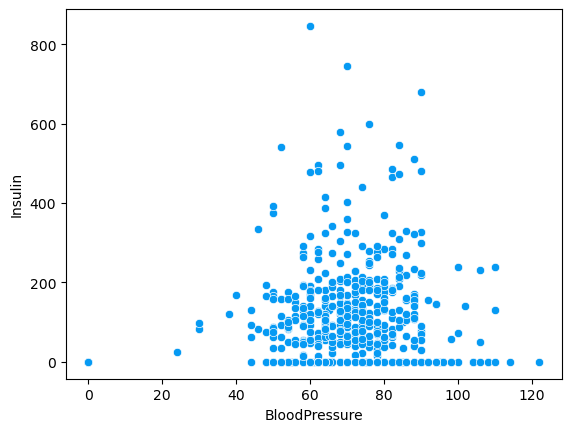

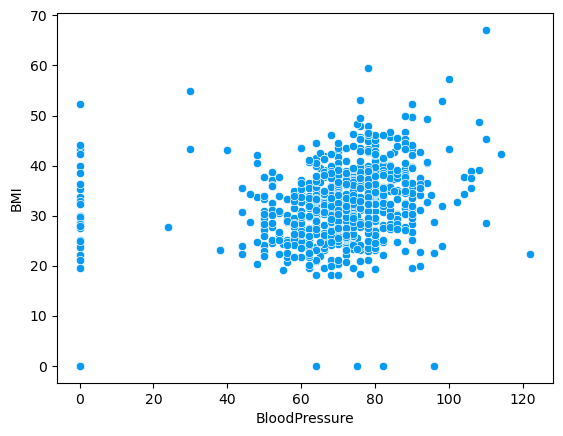

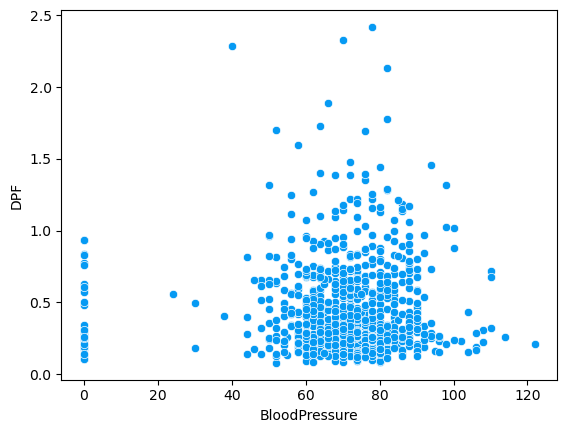

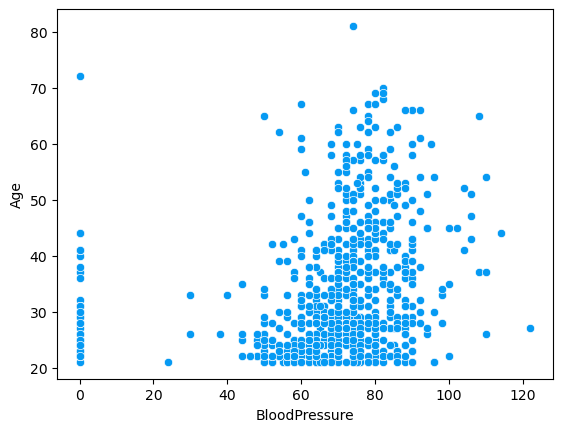

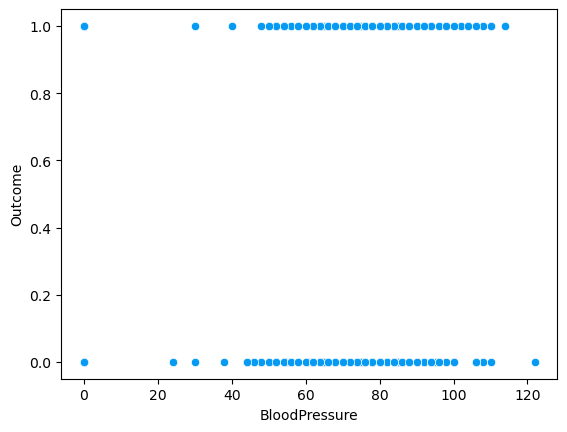

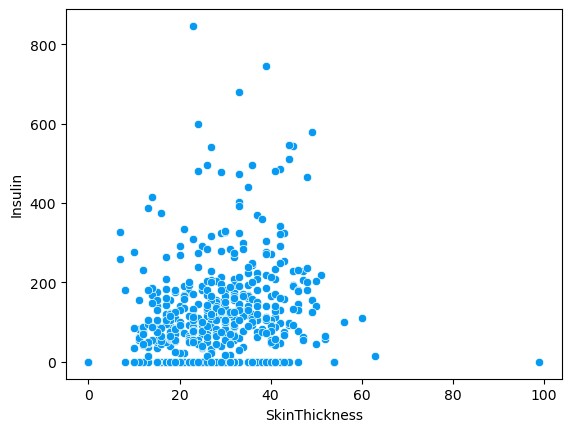

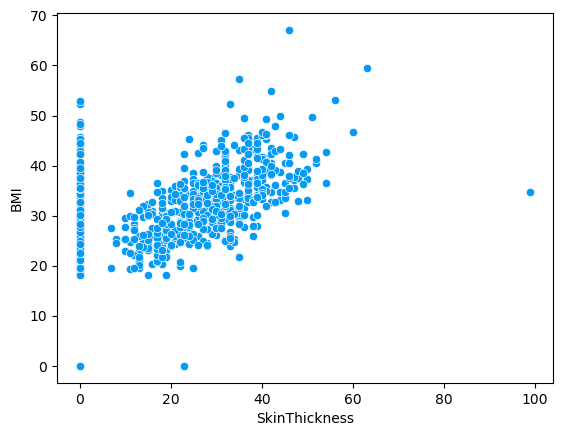

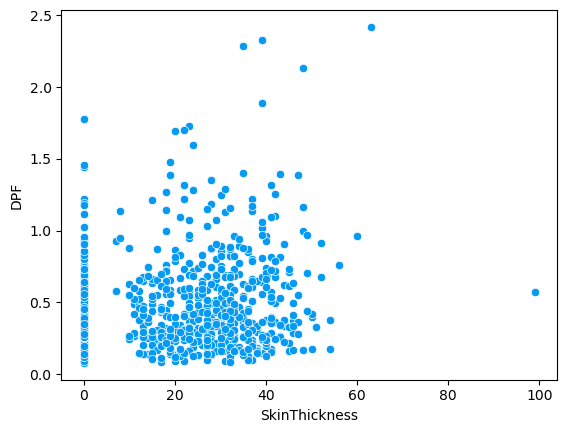

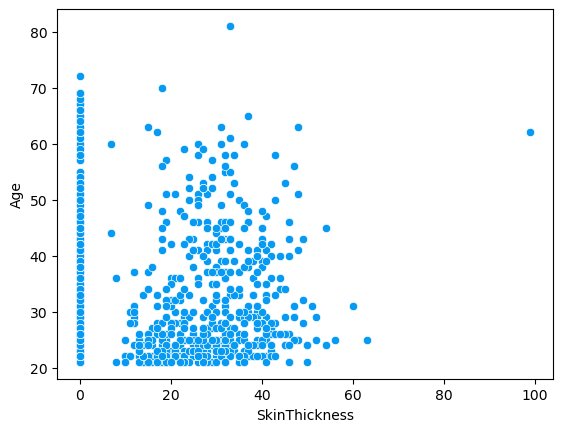

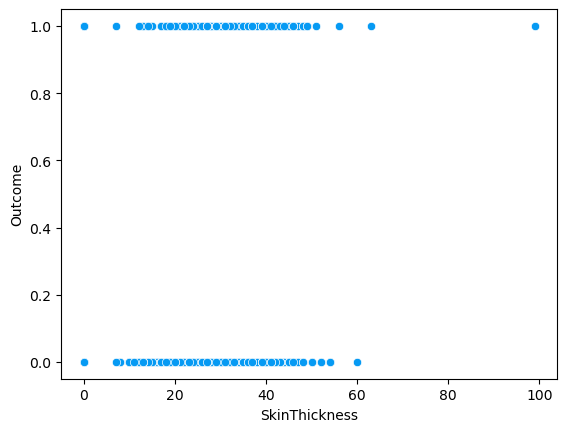

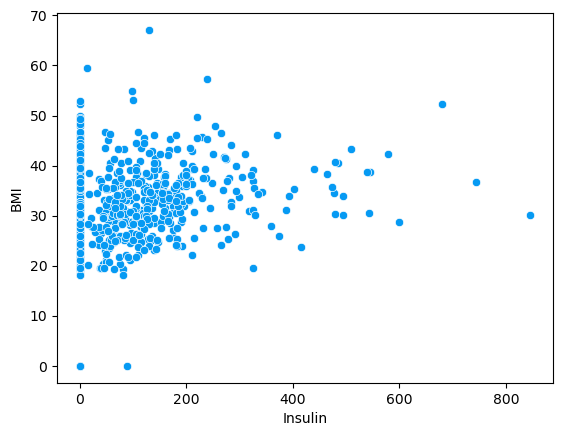

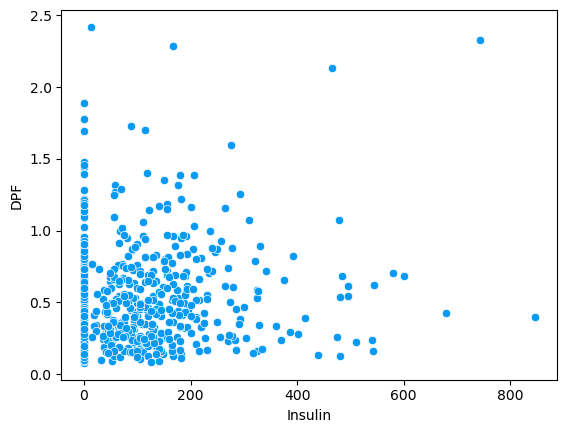

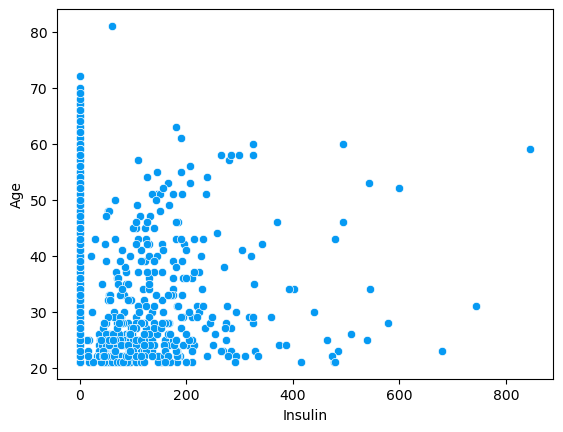

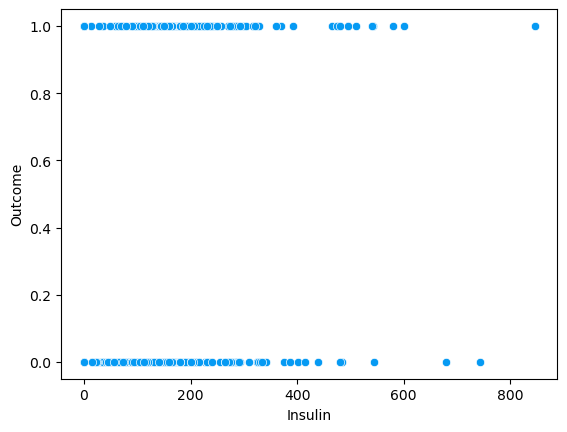

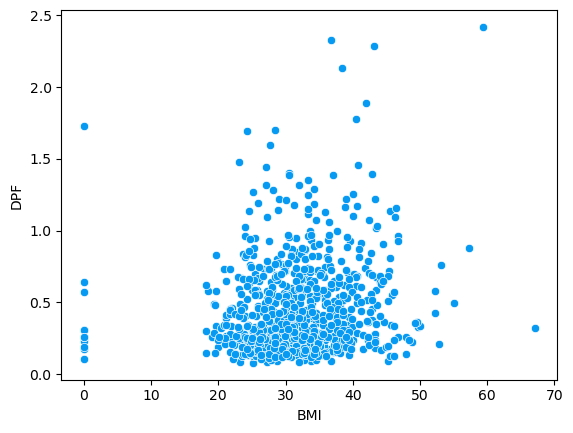

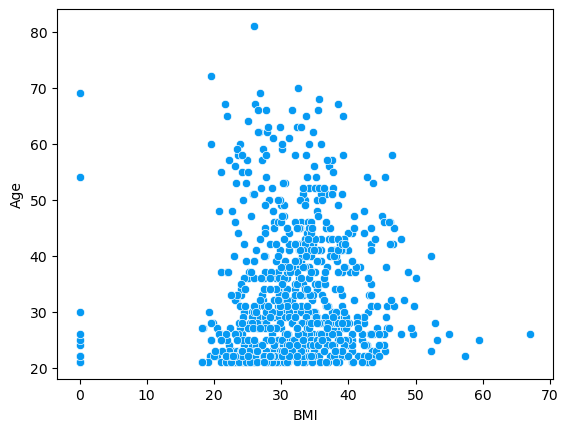

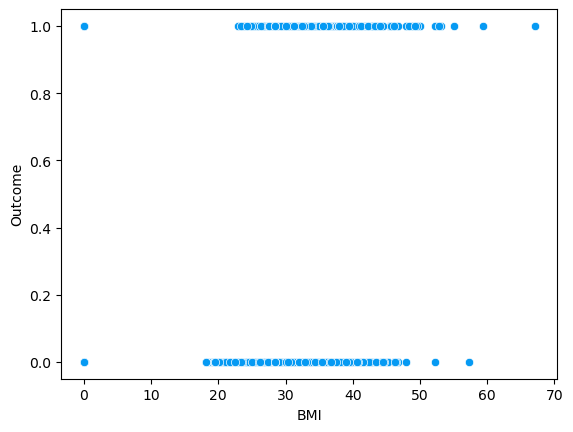

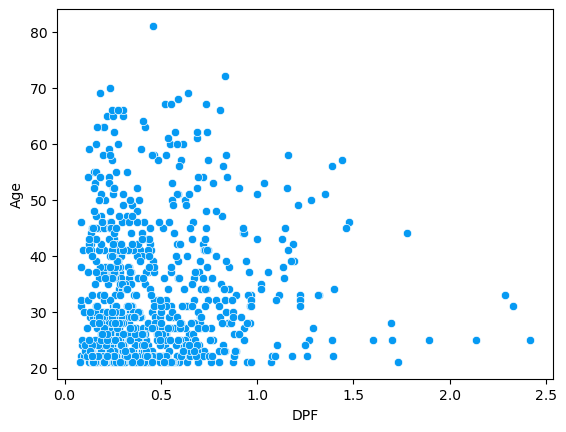

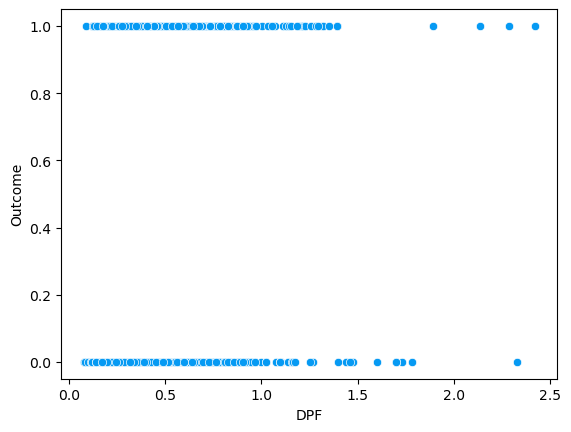

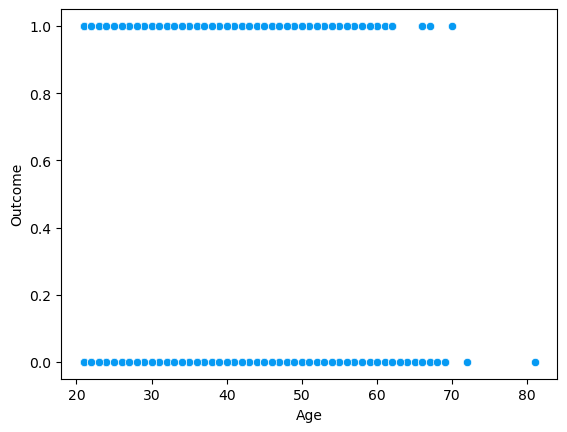

In [82]:
 for i in range(0,len(cols)):
    for j in range(i+1,len(cols)):
        x_l=cols[i]
        y_l=cols[j]
        sns.scatterplot(x=x_l,y=y_l,data=df,color="#069AF3")
        plt.show()

In [83]:
for col in cols:
    countzeros=(df[col]==0 ).sum()
    print(f"The number of zeros in column {col} is : {countzeros}")

The number of zeros in column Glucose is : 5
The number of zeros in column BloodPressure is : 35
The number of zeros in column SkinThickness is : 227
The number of zeros in column Insulin is : 374
The number of zeros in column BMI is : 11
The number of zeros in column DPF is : 0
The number of zeros in column Age is : 0
The number of zeros in column Outcome is : 500


In [8]:
for i in range(0,len(cols)-1):
    mean=df[cols[i]].mean()
    df[cols[i]].replace(0,mean,inplace=True)
    

In [85]:
for col in cols:
    countzeros=(df[col]==0).sum()
    print(f"The number of zeros in column {col} is : {countzeros}")

The number of zeros in column Glucose is : 0
The number of zeros in column BloodPressure is : 0
The number of zeros in column SkinThickness is : 0
The number of zeros in column Insulin is : 0
The number of zeros in column BMI is : 0
The number of zeros in column DPF is : 0
The number of zeros in column Age is : 0
The number of zeros in column Outcome is : 500


<Axes: xlabel='Outcome', ylabel='count'>

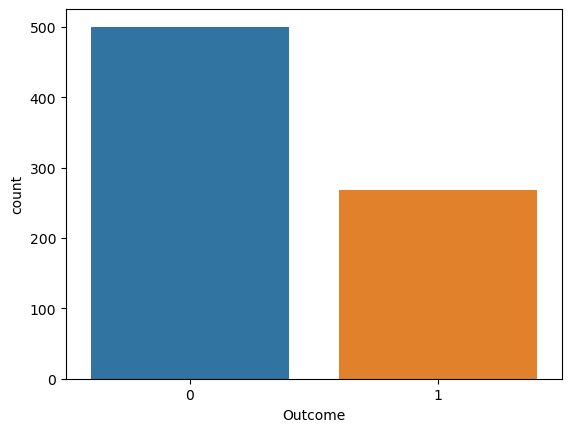

In [86]:
sns.countplot(data=df, x="Outcome")

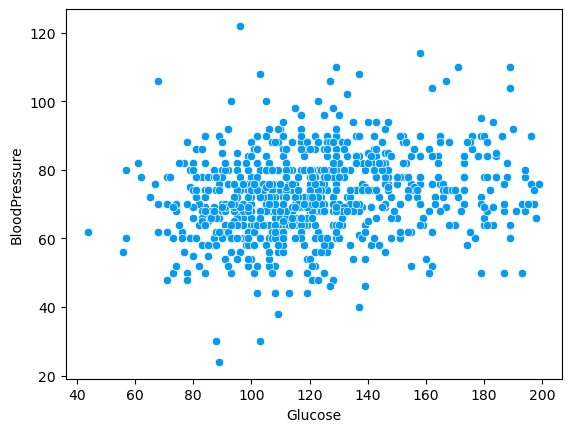

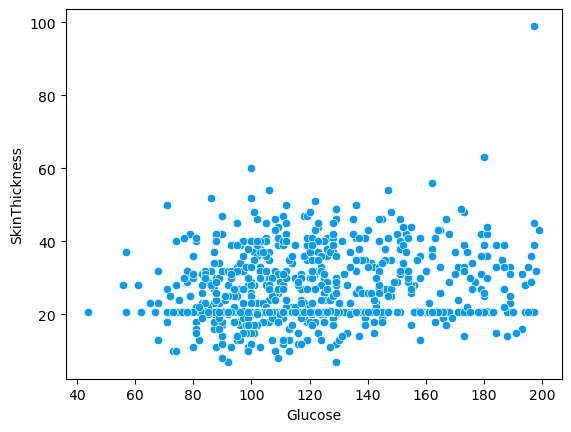

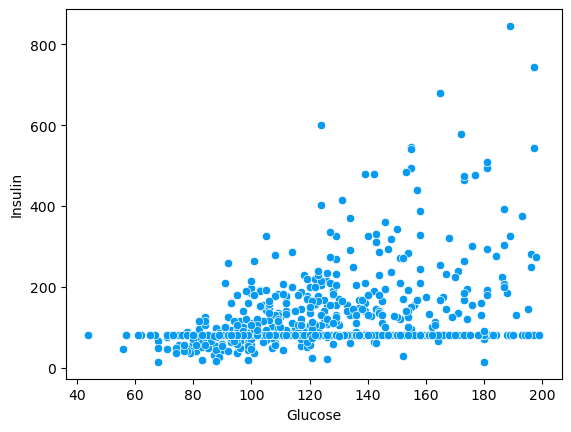

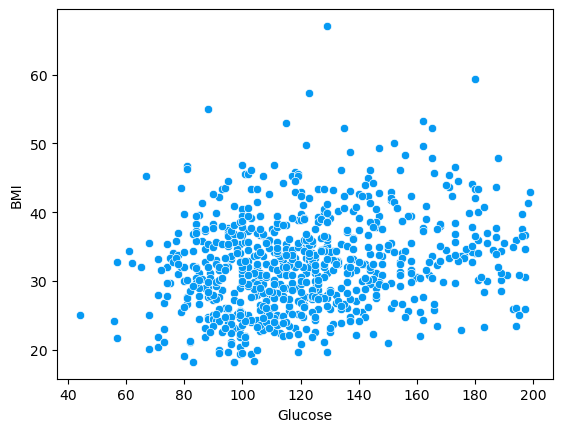

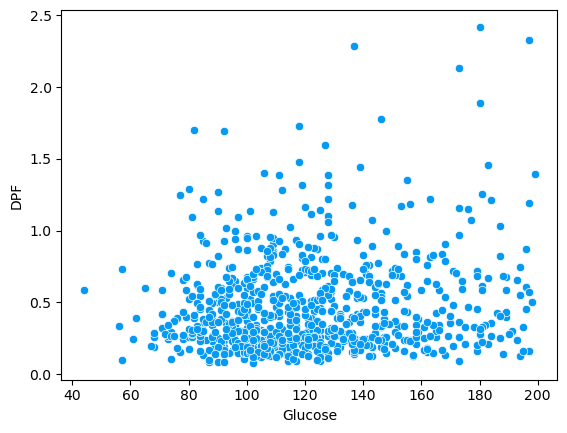

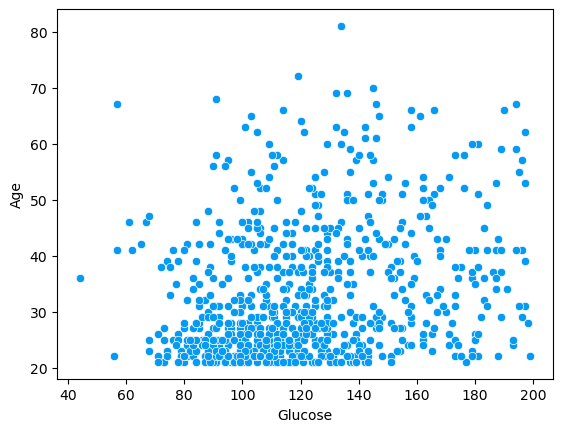

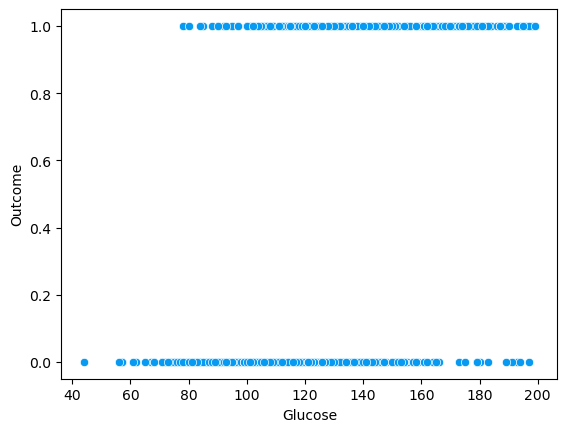

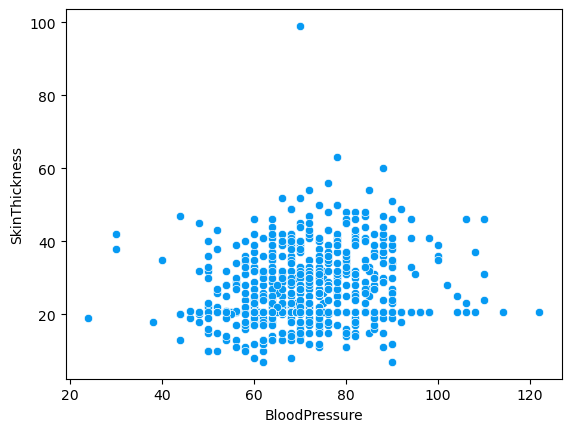

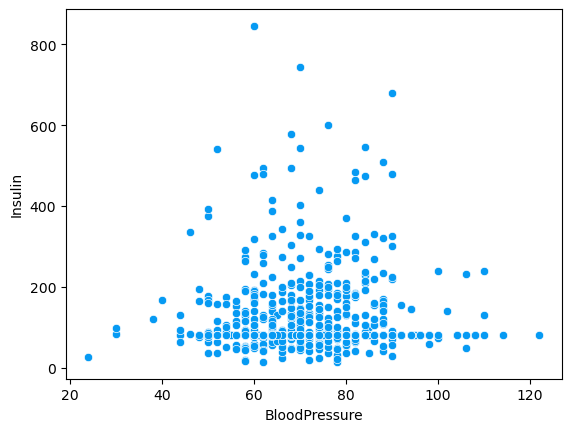

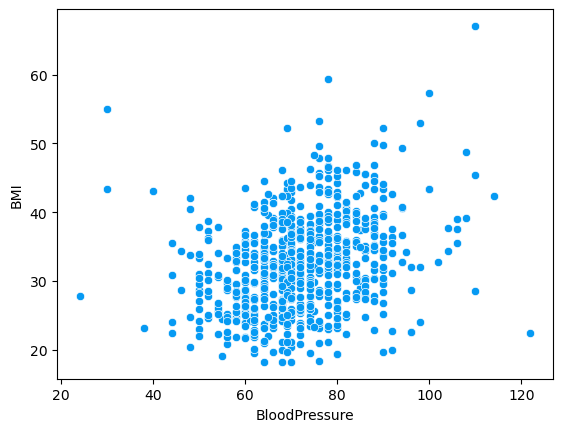

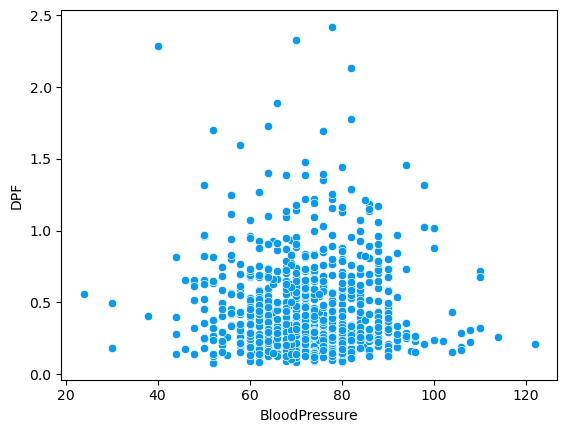

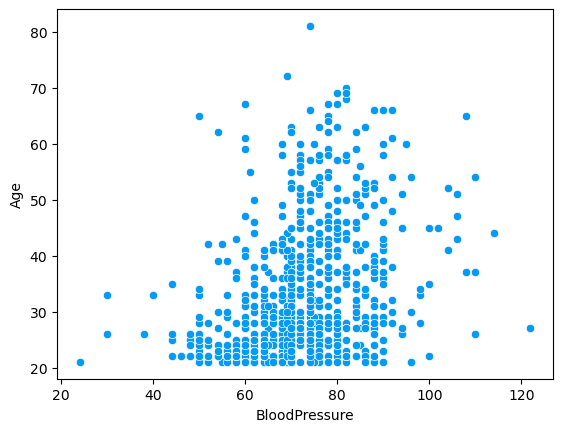

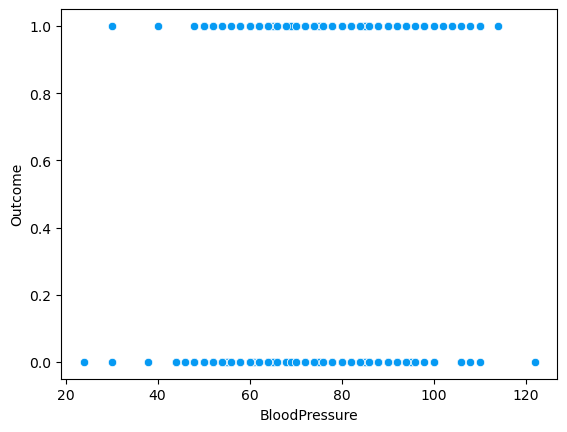

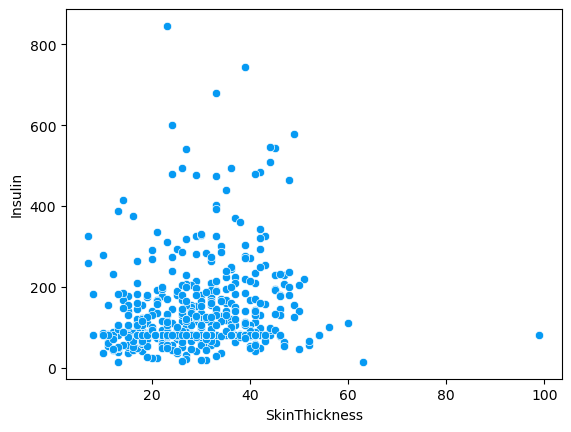

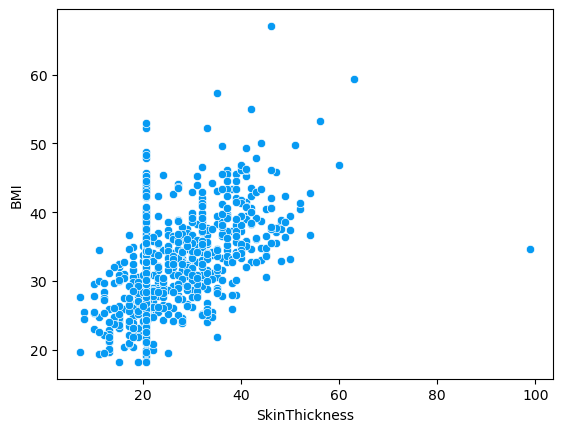

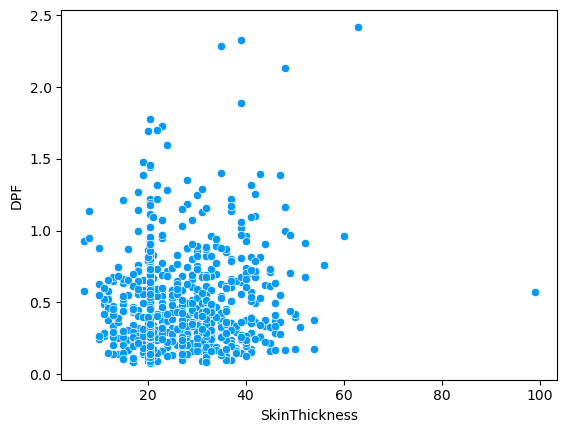

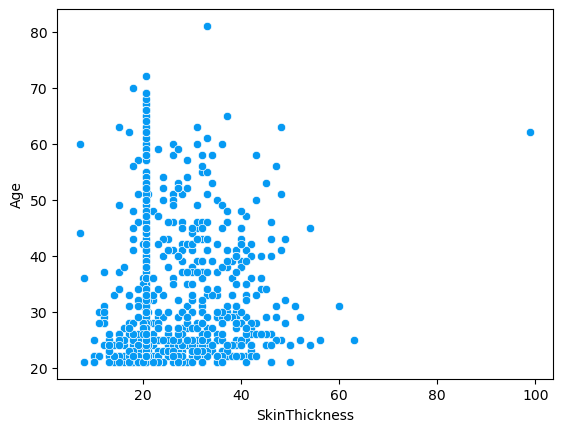

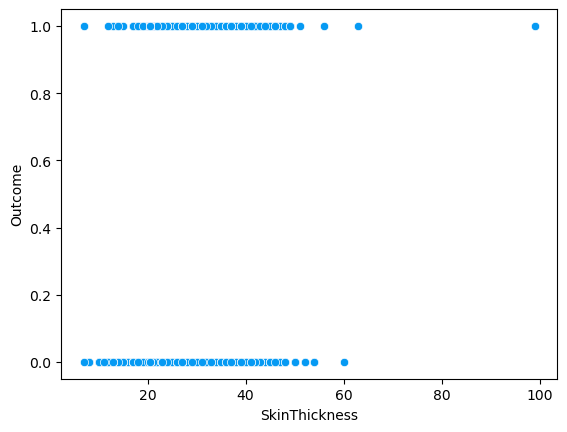

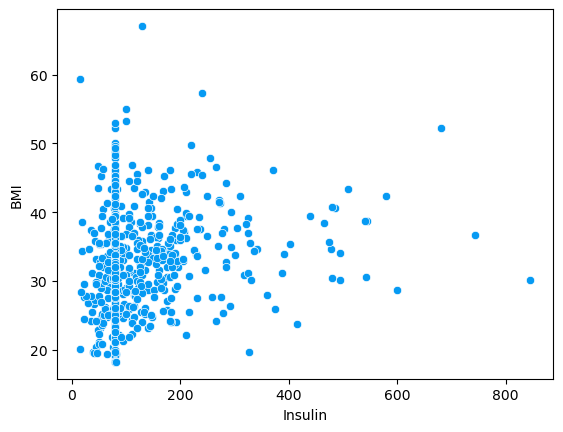

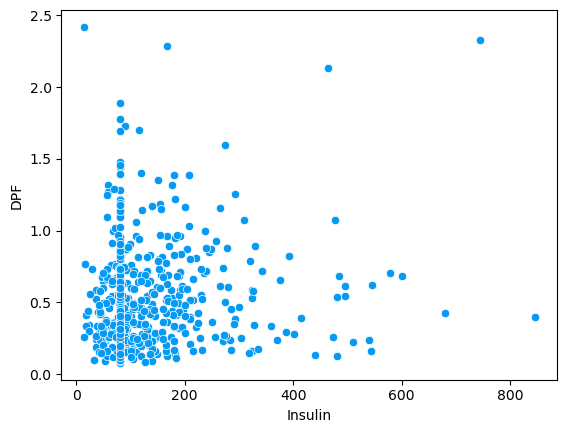

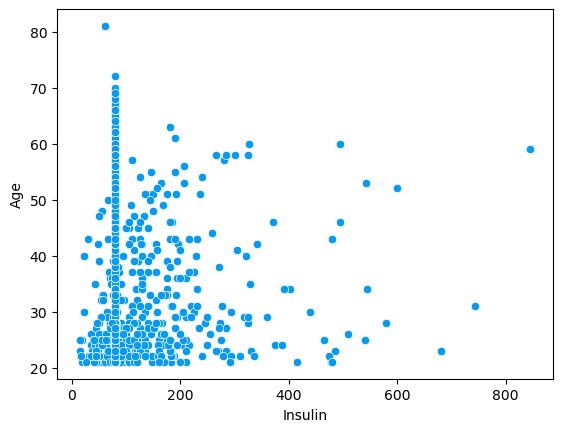

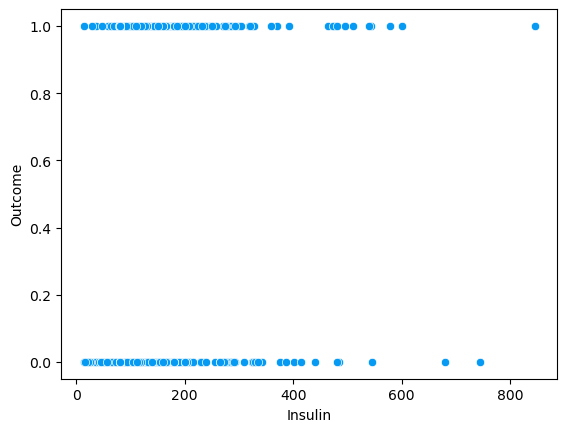

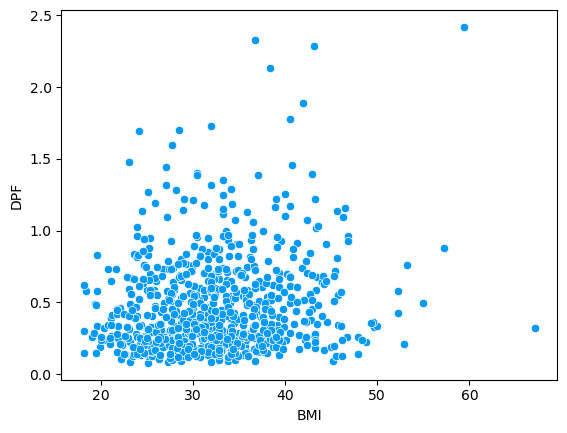

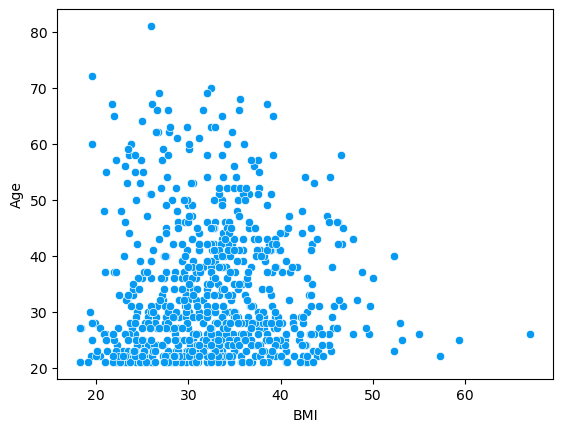

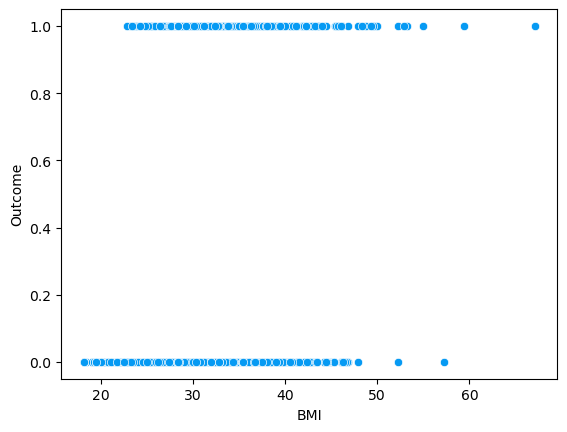

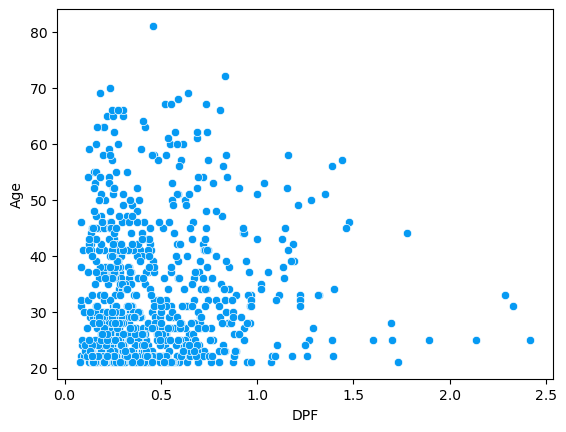

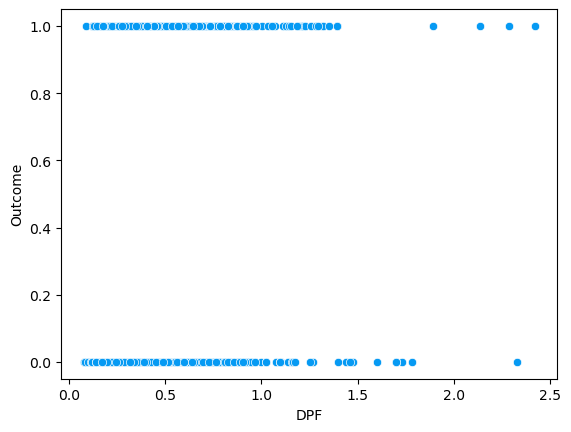

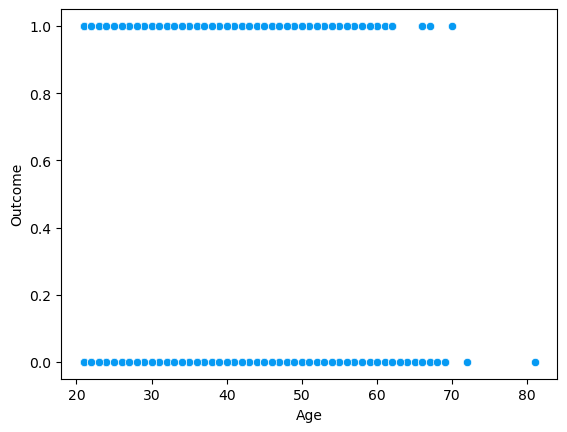

In [87]:
for i in range(0,len(cols)):
    for j in range(i+1,len(cols)):
        x_l=cols[i]
        y_l=cols[j]
        sns.scatterplot(x=x_l,y=y_l,data=df,color="#069AF3")
        plt.show()

In [98]:
X=df.drop(["Outcome","SkinThickness","DPF","Age"],axis=1)

In [100]:
X

,Glucose,BloodPressure,Insulin,BMI
0,148.0,72.0,79.799479,33.6
1,85.0,66.0,79.799479,26.6
2,183.0,64.0,79.799479,23.3
3,89.0,66.0,94.000000,28.1
4,137.0,40.0,168.000000,43.1
...,...,...,...,...
763,101.0,76.0,180.000000,32.9
764,122.0,70.0,79.799479,36.8
765,121.0,72.0,112.000000,26.2
766,126.0,60.0,79.799479,30.1


In [101]:
y=df["Outcome"]

In [102]:
y.value_counts() #we need resampling

0    500
1    268
Name: Outcome, dtype: int64

In [103]:
scaler = preprocessing.StandardScaler()

In [104]:
X= scaler.fit_transform(X)

In [105]:
from imblearn.over_sampling import RandomOverSampler

In [106]:
ros=RandomOverSampler(sampling_strategy=1)

In [107]:
X_ros,y_ros=ros.fit_resample(X,y)

In [108]:
y_ros.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [109]:
X_ros.shape

(1000, 4)

In [110]:
X_ros

array([[ 0.86527574, -0.0210444 , -0.41776815,  0.16725546],
       [-1.20598931, -0.51658286, -0.41776815, -0.85153454],
       [ 2.01597855, -0.68176235, -0.41776815, -1.33182125],
       ...,
       [ 0.01046794,  1.46557097,  1.08944444,  2.51047245],
       [ 0.70088963,  1.79592994,  0.29391436,  0.60387974],
       [ 1.95022411,  0.97003251,  0.78843306,  0.50200074]])

In [111]:
X_ros.shape

(1000, 4)

In [112]:
y_ros.shape

(1000,)

In [113]:
X_ros["BMI"].value_counts()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
for i in X:
    sns.countplot(data=df, x=i)
    plt.show()

In [ ]:
for i in X_ros:
    sns.countplot(data=df,x=i)
    plt.show()

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 0,stratify=y_ros)

In [116]:
y_train.value_counts()

1    400
0    400
Name: Outcome, dtype: int64

In [117]:
y_test.value_counts()

0    100
1    100
Name: Outcome, dtype: int64

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logreg = LogisticRegression()

In [120]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [122]:
logreg.predict_proba(X_test)

array([[0.80765223, 0.19234777],
       [0.07685688, 0.92314312],
       [0.80939426, 0.19060574],
       [0.25003117, 0.74996883],
       [0.09464749, 0.90535251],
       [0.90536783, 0.09463217],
       [0.79916955, 0.20083045],
       [0.06536008, 0.93463992],
       [0.49686913, 0.50313087],
       [0.74476939, 0.25523061],
       [0.84596841, 0.15403159],
       [0.84988301, 0.15011699],
       [0.15571935, 0.84428065],
       [0.05672114, 0.94327886],
       [0.25003117, 0.74996883],
       [0.10832536, 0.89167464],
       [0.78302215, 0.21697785],
       [0.72117295, 0.27882705],
       [0.71740526, 0.28259474],
       [0.39148735, 0.60851265],
       [0.89526734, 0.10473266],
       [0.48237704, 0.51762296],
       [0.35708887, 0.64291113],
       [0.09557531, 0.90442469],
       [0.83176381, 0.16823619],
       [0.41014348, 0.58985652],
       [0.65381075, 0.34618925],
       [0.2339921 , 0.7660079 ],
       [0.4207728 , 0.5792272 ],
       [0.14062343, 0.85937657],
       [0.

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
acc=accuracy_score(y_test, y_pred_test)

In [125]:
print('Model accuracy score: {0:0.4f}'. format(acc))

Model accuracy score: 0.7500


In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
cm = confusion_matrix(y_test, y_pred_test)


In [128]:
cm

array([[79, 21],
       [29, 71]], dtype=int64)

<Axes: >

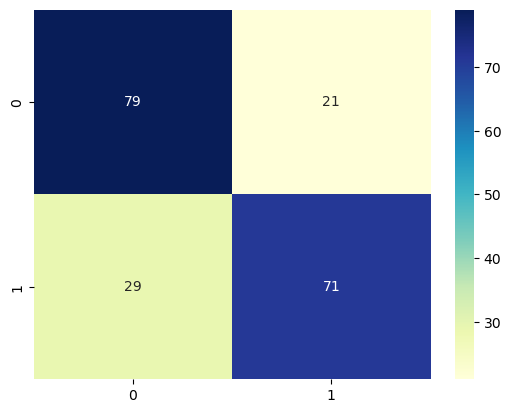

In [129]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [130]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

<Axes: >

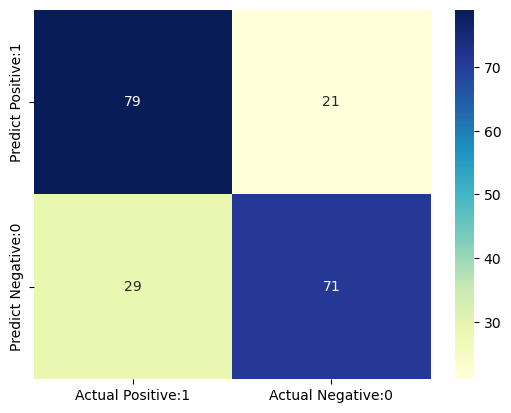

In [131]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [132]:
from sklearn.metrics import classification_report


In [133]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       100
           1       0.77      0.71      0.74       100

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



What is macro avg or weighted average?
Macro-averaged: all classes equally contribute to the final averaged metric. Weighted-averaged: each classes's contribution to the average is weighted by its size.

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
gnb = GaussianNB()


In [136]:
gnb.fit(X_train, y_train)

GaussianNB()

In [137]:
y_pred = gnb.predict(X_test)

y_pred


array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [138]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7200


In [139]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [140]:
y_pred2 = dec_tree_reg.predict(X_test)

In [141]:
y_pred2

array([0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.])

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [143]:
error = mean_squared_error(y_test, y_pred2)


In [144]:
error

0.165

In [145]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [146]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred3 = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred3))
print("${:,.02f}".format(error))

$0.42


In [147]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=4, random_state=0)

In [154]:
X1 = np.array([[148.0,72.0,79.799479,33.6]])
X1 = X1.astype(float)

In [155]:
X1

array([[148.      ,  72.      ,  79.799479,  33.6     ]])

In [156]:
X2=scaler.fit_transform(X1)

In [157]:
y_pred4 = regressor.predict(X2)

In [158]:
y_pred4

array([0.53811659])

In [159]:
import pickle
data = {"model": regressor}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)